In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, ttest_1samp, ttest_ind, levene,  bartlett
from statsmodels.stats.proportion import proportions_ztest
import warnings


In [3]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv('data/phone.csv')

# Drop the first column
df = df.drop(df.columns[0], axis=1)

# Remove rows where 'brand' is 'undefined'
df = df.drop(df[df['brand'] == 'undefined'].index)

# Select numerical and object columns
df_num = df.select_dtypes(include=['number'])
df_str = df.select_dtypes(include=['object'])

# Print the shape of the dataframe and check for null values
print(df.shape)
print(df.isnull().sum())

(1997, 11)
battery_power    0
clock_speed      0
ram              0
n_cores          0
use_time         0
px_width         0
px_height        0
brand            0
5g               0
grade            0
price            0
dtype: int64


# Nomor 1

In [5]:
IQR = {}

for column in df_num.columns:
  print("Rata-rata kolom", column, "adalah", np.mean(df[column]))
  
  print("Median kolom", column, "adalah", np.median(df[column]))

  mode = stats.mode(df[column])
  print("Modus kolom", column, "adalah", mode.mode, "dengan kemunculan sebanyak", mode.count)

  print("Standar deviasi kolom", column, "adalah", np.std(df[column]))

  print("Variansi kolom", column, "adalah", np.var(df[column]))

  print("Range kolom", column, "adalah", np.ptp(df[column]))

  print("Nilai minimum :", np.min(df[column]))
  print("Nilai Maksimum", np.max(df[column]))

  arr = df[column]
  print("Kuartil 1, 2, dan 3 dari kolom ", column, " adalah")
  print(np.percentile(arr, 25), np.percentile(arr, 50), np.percentile(arr, 75), sep = ", ")

  IQR[column] = np.percentile(df[column], 75) - np.percentile(df[column], 25)
  print("IQR kolom", column, "adalah", IQR[column])

  print("Skewness kolom", column, "adalah", stats.skew(df[column]))

  print("Kurtosis kolom", column, "adalah", stats.kurtosis(df[column]))
  
  print("\n")

Rata-rata kolom battery_power adalah 1920.7194820204913
Median kolom battery_power adalah 1922.31441371664
Modus kolom battery_power adalah 1420.9542711910349 dengan kemunculan sebanyak 1
Standar deviasi kolom battery_power adalah 136.19172952407874
Variansi kolom battery_power adalah 18548.18719075982
Range kolom battery_power adalah 981.0035468694759
Nilai minimum kolom battery_power adalah 1420.9542711910349 dan maksimumnya adalah 2401.957818060511
Kuartil 1, 2, dan 3 dari kolom  battery_power  adalah
1833.8684847384684, 1922.31441371664, 2011.284926846724
IQR kolom battery_power adalah 177.41644210825552
Skewness kolom battery_power adalah -0.042146095711575744
Kurtosis kolom battery_power adalah 0.21838689089654117


Rata-rata kolom clock_speed adalah 1.102619140443319
Median kolom clock_speed adalah 1.1003787482436298
Modus kolom clock_speed adalah 0.063078405199159 dengan kemunculan sebanyak 1
Standar deviasi kolom clock_speed adalah 0.30077062362949136
Variansi kolom clock_spee

In [6]:
# DataFrame string
for column in df_str.columns:
  
  # Nilai unik
  print(f"Nilai unik untuk kolom '{column}':")
  print(df_str[column].unique())
  
  # Proporsi
  print("\nProporsi:")
  print(df_str[column].value_counts(normalize=True))
  print()

Nilai unik untuk kolom 'brand':
['appa' 'sumseng' 'oranye' 'largeyou']

Proporsi:
brand
sumseng     0.338007
oranye      0.239359
largeyou    0.212819
appa        0.209815
Name: proportion, dtype: float64

Nilai unik untuk kolom 'grade':
['B' 'C' 'A']

Proporsi:
grade
A    0.346019
B    0.341512
C    0.312469
Name: proportion, dtype: float64



# Nomor 2

In [7]:
# cek ada ato nggak outlier
for column in df_num.columns:

  # Calculate Q1, Q3, and IQR
  Q1 = df_num[column].quantile(0.25)
  Q3 = df_num[column].quantile(0.75)
  IQR = Q3 - Q1

  # Calculate lower bound and upper bound
  lowerBound = Q1 - 1.5 * IQR
  upperBound = Q3 + 1.5 * IQR
    
  # Cetak outlier
  print("Outlier dari kolom", column, "adalah:")
  print(df_num[(df_num[column] < lowerBound) | (df_num[column] > upperBound)][column])
  print()

Outlier dari kolom battery_power adalah:
117     1553.766029
120     1493.397642
210     1563.639346
282     2289.251076
378     2307.072694
438     2401.957818
492     2289.348438
536     1525.842443
718     1566.283517
754     1557.530230
762     1488.948363
903     2363.451821
986     2331.185458
1005    1534.668853
1199    1420.954271
1206    1477.965749
1234    1550.042708
1319    1530.624039
1511    1522.055910
1575    1519.032034
1643    2321.463264
1685    2291.581698
1908    2281.544845
1948    2352.078882
1968    1506.515170
Name: battery_power, dtype: float64

Outlier dari kolom clock_speed adalah:
145     1.981452
186     1.954328
214     0.269403
290     0.256667
394     0.285339
506     1.917131
936     1.974235
1156    0.063078
1351    0.086511
1372    0.287064
1571    2.145640
1638    2.056815
1808    0.188163
1858    0.202770
1912    0.178785
Name: clock_speed, dtype: float64

Outlier dari kolom ram adalah:
27       0.473096
441     11.730657
494     12.147370
864     

In [8]:
# Remove outliers
for column in df_num.columns:
  Q1 = df_num[column].quantile(0.25)
  Q3 = df_num[column].quantile(0.75)
  IQR = Q3 - Q1

  # Hapus outlier
  length_before = len(df_num[column])
  df_num = df_num[(df_num[column] >= Q1 - 1.5 * IQR) & (df_num[column] <= Q3 + 1.5 * IQR)]
  length_after = len(df_num[column])

  # Cetak panjang DataFrame sebelum dan sesudah penghapusan outlier
  print(f"Panjang DataFrame sebelum penghapusan outlier di kolom {column}:", length_before)
  print(f"Panjang DataFrame setelah penghapusan outlier di kolom {column}:", length_after)
  print()

Panjang DataFrame sebelum penghapusan outlier di kolom battery_power: 1997
Panjang DataFrame setelah penghapusan outlier di kolom battery_power: 1972

Panjang DataFrame sebelum penghapusan outlier di kolom clock_speed: 1972
Panjang DataFrame setelah penghapusan outlier di kolom clock_speed: 1955

Panjang DataFrame sebelum penghapusan outlier di kolom ram: 1955
Panjang DataFrame setelah penghapusan outlier di kolom ram: 1943

Panjang DataFrame sebelum penghapusan outlier di kolom n_cores: 1943
Panjang DataFrame setelah penghapusan outlier di kolom n_cores: 1931

Panjang DataFrame sebelum penghapusan outlier di kolom use_time: 1931
Panjang DataFrame setelah penghapusan outlier di kolom use_time: 1915

Panjang DataFrame sebelum penghapusan outlier di kolom px_width: 1915
Panjang DataFrame setelah penghapusan outlier di kolom px_width: 1896

Panjang DataFrame sebelum penghapusan outlier di kolom px_height: 1896
Panjang DataFrame setelah penghapusan outlier di kolom px_height: 1873

Panjang

# Nomor 3

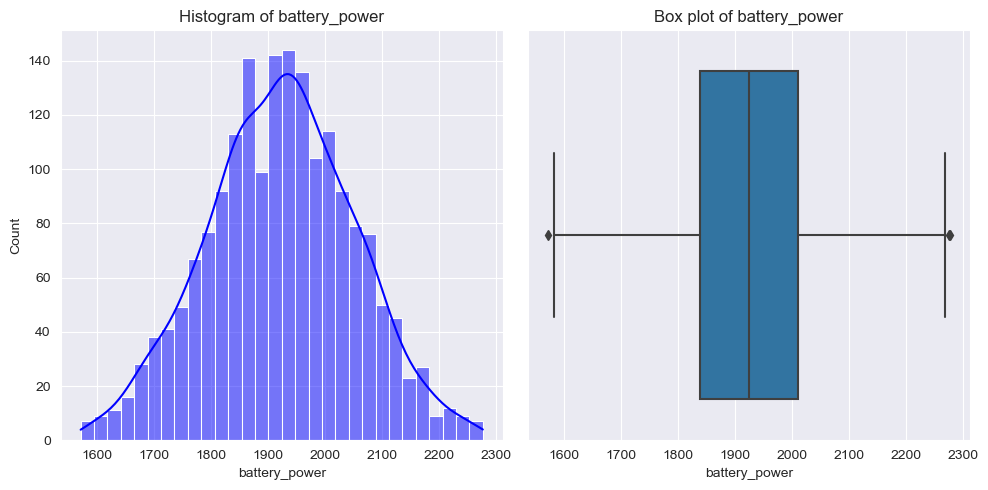

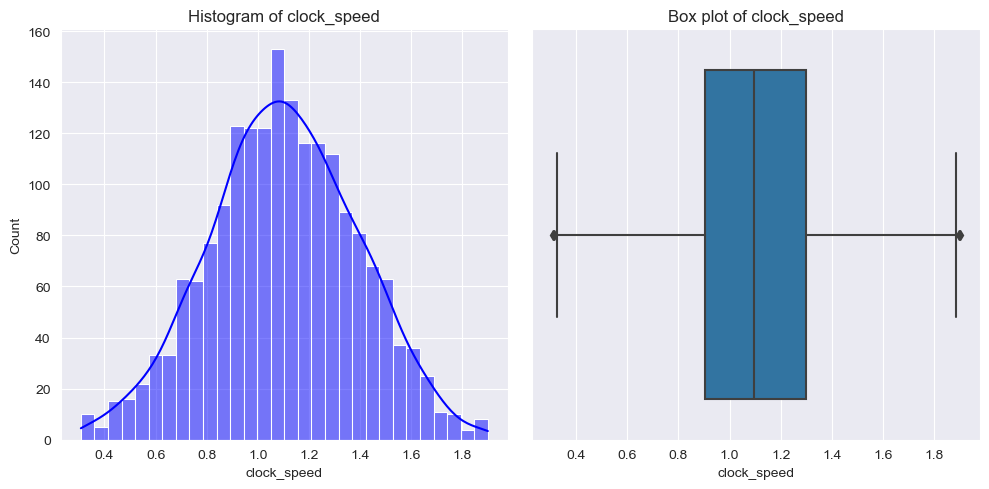

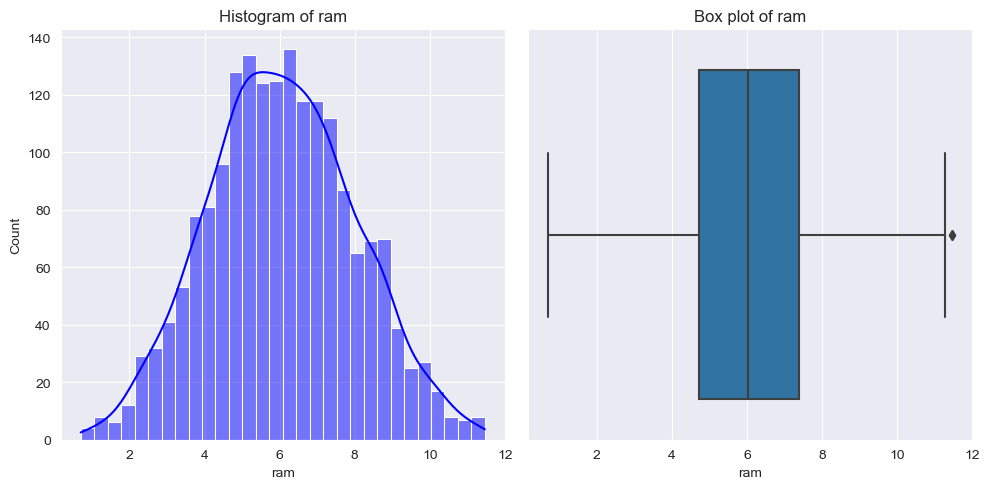

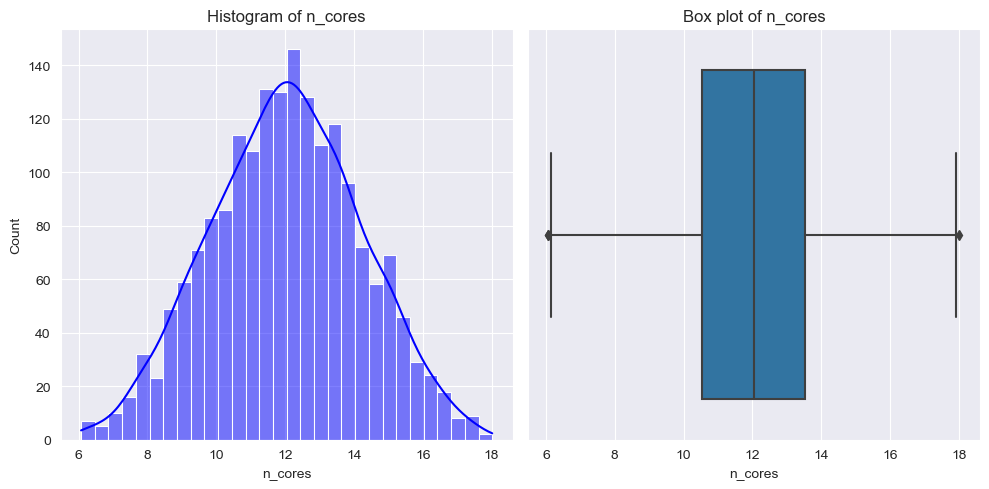

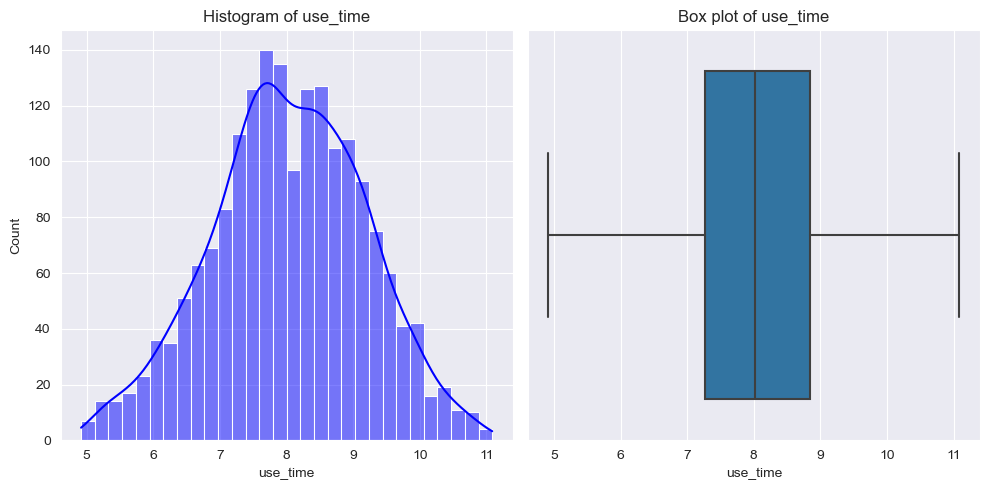

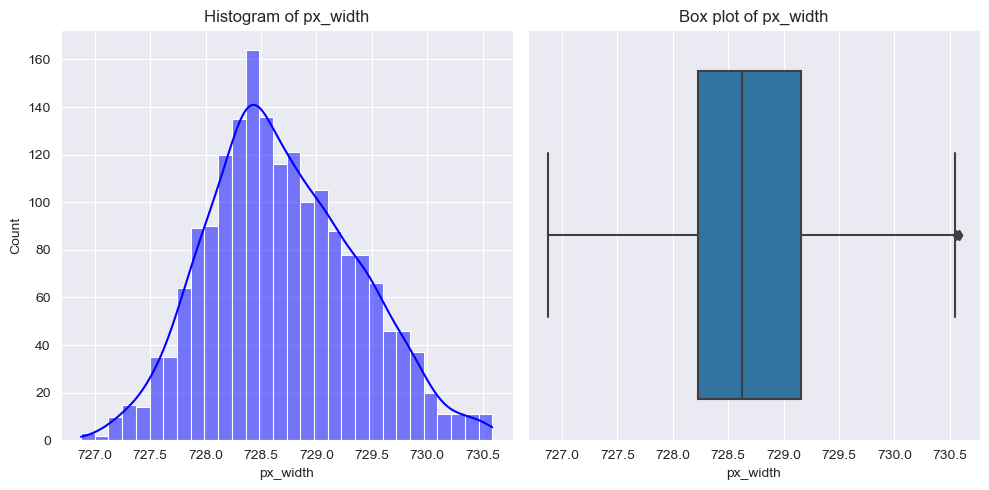

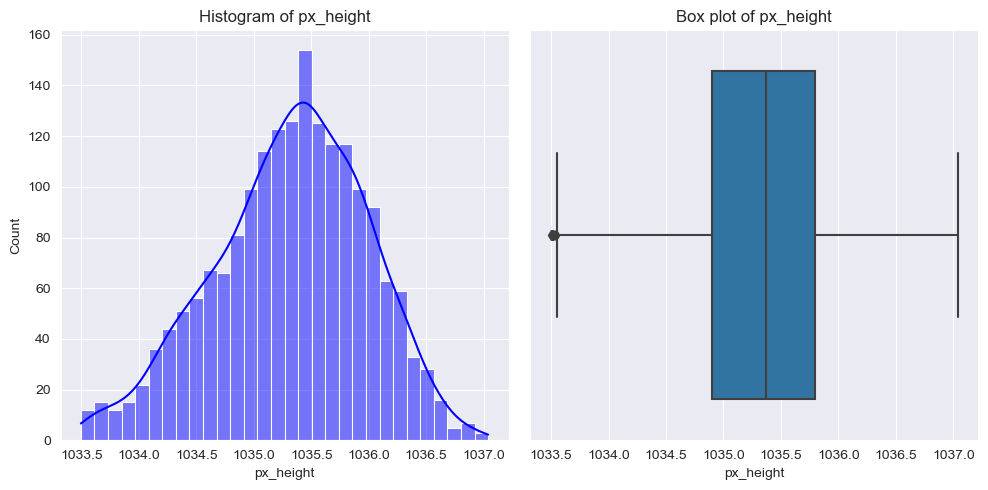

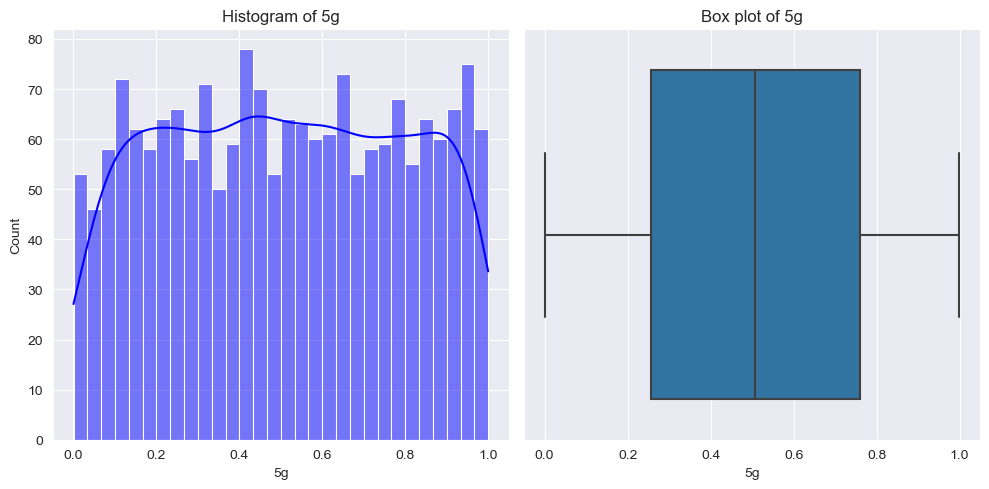

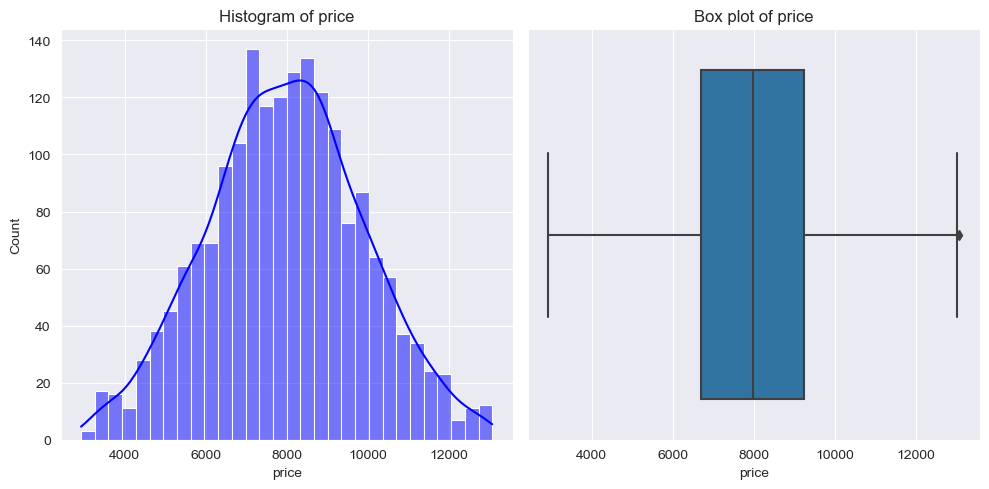

In [12]:
# DataFrame numerik
for col in df_num.columns:
  
  # Buat figure
  plt.figure(figsize=(10, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(df_num[col], kde=True, color='blue', bins=30)
  plt.title(f'Histogram of {col}')

  # Box plot
  plt.subplot(1, 2, 2)
  sns.boxplot(x=df_num[col], orient='h')
  plt.title(f'Box plot of {col}')

  # Tampilkan plot
  plt.tight_layout()
  plt.show()

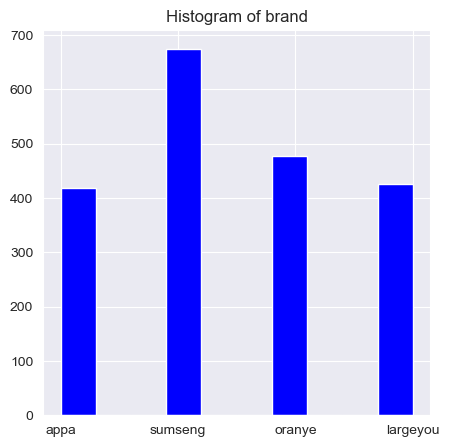

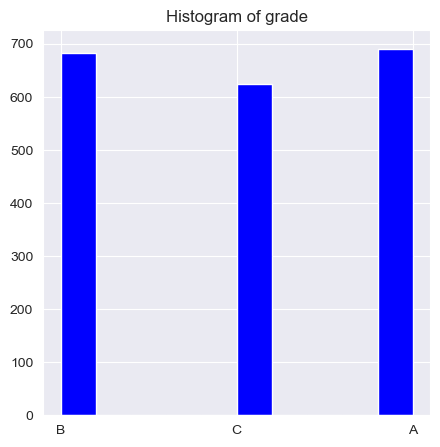

In [15]:
# DataFrame string
for col in df_str.columns:
  # Buat figure
  plt.figure(figsize=(5, 5) , dpi=100)

  # Histogram
  plt.hist(df_str[col], bins=10, color='blue')
  plt.title(f'Histogram of {col}')

  # Tampilkan plot
  plt.show()

# Nomor 4

In [14]:
for column in df_num.columns:
  #   Shapiro-Wilk test
  stat, p = shapiro(df_num[column])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  alpha = 0.05

  if p > alpha:
      print(f'{column} memiliki distribusi normal')
  else:
      print(f'{column} tidak memiliki distribusi normal')
      
  print()

Statistics=0.998, p=0.042
battery_power does not have a Gaussian distribution

Statistics=0.998, p=0.055
clock_speed has a Gaussian distribution

Statistics=0.998, p=0.006
ram does not have a Gaussian distribution

Statistics=0.998, p=0.009
n_cores does not have a Gaussian distribution

Statistics=0.997, p=0.001
use_time does not have a Gaussian distribution

Statistics=0.992, p=0.000
px_width does not have a Gaussian distribution

Statistics=0.991, p=0.000
px_height does not have a Gaussian distribution

Statistics=0.956, p=0.000
5g does not have a Gaussian distribution

Statistics=0.998, p=0.007
price does not have a Gaussian distribution



# Nomor 5

In [20]:
# Hipotesis 1: rata-rata nilai battery_power lebih dari 1800
mu = 1800
battery_power = df['battery_power']
t_statistic, p_value = ttest_1samp(battery_power, mu)
print(f"Hipotesis 1: rata-rata nilai battery_power lebih dari 1800")
print(f"t-statistic: {t_statistic}, p-value: {p_value}\n")

Hipotesis 1: rata-rata nilai battery_power lebih dari 1800
t-statistic: 39.60106782946424, p-value: 1.3380115697190484e-253



In [21]:
# Hipotesis 2: rata-rata ram sama dengan 8 GB
mu = 8
ram = df['ram']
t_statistic, p_value = ttest_1samp(ram, mu)
print(f"Hipotesis 2: rata-rata ram sama dengan 8 GB")
print(f"t-statistic: {t_statistic}, p-value: {p_value}\n")

Hipotesis 2: rata-rata ram sama dengan 8 GB
t-statistic: -43.39687076882105, p-value: 2.4782551031768637e-290



In [22]:
# Hipotesis 3: rata-rata clock_speed 250 data pertama tidak sama dengan 1
mu = 1
clock_speed = df['clock_speed'].head(250)
t_statistic, p_value = ttest_1samp(clock_speed, mu)
print(f"Hipotesis 3: rata-rata clock_speed 250 data pertama tidak sama dengan 1")
print(f"t-statistic: {t_statistic}, p-value: {p_value}\n")

Hipotesis 3: rata-rata clock_speed 250 data pertama tidak sama dengan 1
t-statistic: 4.306835454648206, p-value: 2.384199065017735e-05



In [23]:
# Hipotesis 4: rata-rata use_time smartphone merek “appa” lebih dari 8.5 tidak sama dengan 35%
mu = 8.5
prop = 0.35
use_time = df[df['brand'] == 'appa']['use_time']
n = len(use_time)
success = sum(use_time > mu)
z_statistic, p_value = proportions_ztest(success, n, prop)
print(f"Hipotesis 4: rata-rata use_time smartphone merek “appa” lebih dari 8.5 tidak sama dengan 35%")
print(f"z-statistic: {z_statistic}, p-value: {p_value}\n")

Hipotesis 4: rata-rata use_time smartphone merek “appa” lebih dari 8.5 tidak sama dengan 35%
z-statistic: -0.5841488217145567, p-value: 0.5591201903602339



# Nomor 6

In [26]:
# Bagi dataset menjadi dua bagian
half = len(df) // 2
df_first_half = df.iloc[:half]
df_second_half = df.iloc[half:]

In [27]:
# Hipotesis 1: rata-rata n_cores smartphone generasi sebelumnya sama dengan generasi sekarang
n_cores_first = df_first_half['n_cores']
n_cores_second = df_second_half['n_cores']
t_statistic, p_value = ttest_ind(n_cores_first, n_cores_second)
print(f"Hipotesis 1: rata-rata n_cores smartphone generasi sebelumnya sama dengan generasi sekarang")
print(f"t-statistic: {t_statistic}, p-value: {p_value}\n")

Hipotesis 1: rata-rata n_cores smartphone generasi sebelumnya sama dengan generasi sekarang
t-statistic: 1.1014725388987614, p-value: 0.2708239208454442



In [28]:
# Hipotesis 2: harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya
price_first = df_first_half['price']
price_second = df_second_half['price']
t_statistic, p_value = ttest_ind(price_first, price_second - 100)
print(f"Hipotesis 2: harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya")
print(f"t-statistic: {t_statistic}, p-value: {p_value}\n")

Hipotesis 2: harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya
t-statistic: 1.138341115417425, p-value: 0.25511475206726353



In [31]:
# Hipotesis 3: variansi px_height sama pada kedua generasi
px_height_first = df_first_half['px_height']
px_height_second = df_second_half['px_height']
statistic, p_value = levene(px_height_first, px_height_second)
print(f"Hipotesis 3: variansi px_height sama pada kedua generasi")
print(f"statistic: {statistic}, p-value: {p_value}\n")

Hipotesis 3: variansi px_height sama pada kedua generasi
statistic: 1.0282193053637632, p-value: 0.3107002291908578



In [32]:
# Hipotesis 4: proporsi battery_power > 2030 lebih besar pada generasi sebelumnya
battery_power_first = df_first_half['battery_power'] > 2030
battery_power_second = df_second_half['battery_power'] > 2030
n_first = len(battery_power_first)
n_second = len(battery_power_second)
success_first = sum(battery_power_first)
success_second = sum(battery_power_second)
z_statistic, p_value = proportions_ztest([success_first, success_second], [n_first, n_second], alternative='larger')
print(f"Hipotesis 4: proporsi battery_power > 2030 lebih besar pada generasi sebelumnya")
print(f"z-statistic: {z_statistic}, p-value: {p_value}\n")

Hipotesis 4: proporsi battery_power > 2030 lebih besar pada generasi sebelumnya
z-statistic: -0.48675732124828175, p-value: 0.6867848407771946

